### 광고 제거

In [168]:
import pandas as pd
import numpy as np

#크롤링한 데이터 불러오기
data = pd.read_csv('패션.csv', encoding='utf-8-sig')
data.head()

,Unnamed: 0,time,review,comment,like,url
0,0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2,2021. 1. 1. 16:57,JeffGame [JeffGame] 2021 맞이 덕질정리 ...,[],4,https://blog.naver.com/san_i1002/222192604007
3,3,2021. 1. 1. 15:26,일상 2021년 롯데백화점 MVG 선정기준 / MVG-CROW...,[],20,https://blog.naver.com/ajs7795/222192542424
4,4,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174


In [169]:
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     333 non-null    object
 1   review   333 non-null    object
 2   comment  333 non-null    object
 3   like     333 non-null    object
 4   url      333 non-null    object
dtypes: object(5)
memory usage: 13.1+ KB


### 광고글 특징
- 1. 특정한 단어를 포함한 게시글 : '제공받아', '지원받아', '해당업체' 등등
- 2. (네이버 블로그 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

### 1번 특징 제거
- 광고글 특징을 stopword로 지정하여 해당 글은 삭제할 수 있도록 한다.
- 분석가 판단 하에 추가 광고 문구를 확인하여 stopwords 리스트에 추가해준다.

In [170]:
Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
             '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
             '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널']

In [171]:
#Stopwords가 들어간 글은 삭제
data = data[~data['review'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2021. 1. 1. 16:57,JeffGame [JeffGame] 2021 맞이 덕질정리 ...,[],4,https://blog.naver.com/san_i1002/222192604007
3,2021. 1. 1. 15:26,일상 2021년 롯데백화점 MVG 선정기준 / MVG-CROW...,[],20,https://blog.naver.com/ajs7795/222192542424
4,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
...,...,...,...,...,...
315,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
316,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
317,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795
318,2021. 1. 1. 10:15,Enter 진아름♥남궁민 결혼은 언제? 디스패치 1 1 열애설...,[],[],https://blog.naver.com/force_7/222192347985


### 게시글길이가 3000자 이상이면 광고글 상위 노출 조건이기에 제거

In [172]:
ix = data['review'].str.len() > 3000
data = data.loc[~ix]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430
...,...,...,...,...,...
235,2021. 1. 1. 16:02,게시판 반즈 컴피쿠스 올드스쿨 겟 설이율이 ・ ...,[],46,https://blog.naver.com/cloudiasky/222192566311
236,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
237,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
238,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795


In [173]:
#기본 전처리
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus


In [174]:
#블로그 본문, 댓글 합쳐 하나의 document로 만들기
data['doc'] = data['review'] + ' ' + data['comment']
data.head()

,time,review,comment,like,url,doc
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,​ 양 자 ...
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,wish 2021 첫 위시글 눙이 ・ 2021...
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...


In [175]:
data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 제거
data.doc = data.doc.str.replace("\s"," ") # white space 삭제
data.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_11956\207040674.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 제거
C:\Users\82104\AppData\Local\Temp\ipykernel_11956\207040674.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s"," ") # white space 삭제


,time,review,comment,like,url,doc
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,양 자 ...
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,첫 위시글 눙이 ...
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 올블랙코디 주인장의 코디 ...
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 ...
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,핫딜 직구 르메르 세일에 추가할인코드 마...


In [176]:
# from tqdm import tqdm
# tqdm.pandas()

# data['doc'] = data['doc'].progress_apply(lambda x : clean_text(x))

In [177]:
data.doc

0                                              양  자  ...
1                            첫 위시글       눙이          ...
2              블랙패션코디      올블랙코디  주인장의 코디            ...
3              남성패션     오메가 문워치 프로페셔널 스피드마스터 리뷰      ...
4                    핫딜 직구     르메르    세일에    추가할인코드 마...
                             ...                        
235            게시판     반즈 컴피쿠스 올드스쿨 겟       설이율이     ...
236                         몬스터리퍼블릭  컴파운드 메신저백 대학생 가방...
237            롬이옷장       대 여자 가방 추천   유니크한 영국 브랜드   ...
238            글귀     다이어트 글귀 명언 자극받고 살빼자         루시아...
239                      진아름 남궁민 결혼은 언제  디스패치     열애설...
Name: doc, Length: 240, dtype: object

In [178]:
#검토 후 추가 삭제 문구 적용'
data.doc[1]

'                      첫 위시글       눙이                              복사  이웃추가  본문 기타 기능                      공유하기                   신고하기                 새해가 밝은 기념  지난 한 해 고생한 나에게 선물해준다 생각하고고르는중인 위시템들 정리해보는 글입니다                          첫번째는 텔파 가방이건 사실 저번달부터 사고싶어서 공홈도 들락날락거려봤는데타이밍이안맞는건지   직구는 힘들더라구요                    크림색 스몰으로 사고싶어서 스토어팜이라도 뒤져봤는데스토어팜은 가품이 많은거같아요   재고가 많은 것도 의심스럽고 가격도 쿠폰먹이면 확 저렴해져서정품인지 문의해봤더니 보증서 없는 정품이다 라고만 답변해주길래 급 구매버튼에서 브레이크  직구만이 답인것인가  흡                    두번째는 진짜  년넘게 징하겤    아직도 안샀냐는 소리들을정도인 아크네 베이커백솔직히 이정도 위시면 이미 샀어야하는데사고싶다 사야지 사고싶다 사야지 하면서도 막상 안사게되는거 나만 그런거 아니쟈나     얼마전에 매치스패션에서 너무싸게 파는거 보고난이후로 이건 공홈에 재고가 있어도 못사겠다                       다음은 뒤늦게 꽂힌 르메르 카트리지백이에욯보면볼수록 귀엽고 아른거려                                            이건 진   잘멜거같은데                       이번엔 악세사리  비비안웨스트우드 페트라목걸이인데 색상이 조금 바뀐거같아서 알아보니까 리뉴얼되었다고 해요   리뉴얼 전 버전이 더 좋긴한데 신형이나 구형이나 구하기가 넘 힘들다                     카드지갑도 바꿀때가 되어서 찾아보다가 눈에들어온 마르지엘라 로고바이폴드지갑                                수납공간이랑 크기가 딱 제가 쓰는 정도 메종마

In [179]:
data['doc'] = data['doc'].str.replace('첫 위시글       눙이                              복사  이웃추가  본문 기타 기능                      공유하기                   신고하기                 ',' ')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 지도로 보기 전체지도지도닫기 공유하기 위치 신고하기',' ')

In [180]:
#검토 후 추가 삭제 문구 적용
data.doc[200]

'        오늘의하루       은빛상회   데일리귀걸이로 찰떡인 실버 원터치이어링                                            복사  이웃추가  본문 기타 기능                      공유하기                   신고하기                                    안녕하세요          입니다  저는 항상  원터치링 형태의 귀걸이로 매일끼고있어요일반귀걸이는 아무래도 매일 갈아껴야하는데 그게 너무 불편해서 원터치링의 편리함에 살고있어요     은빛상회에서 구매했는데 감성뿜뿜한 패키지로 배송왔어용                                   아이디어스 에서 연말행사한다길래 보다보니  은빛상회 라는 작가님이 판매하는 실버주얼리들이 있더라구요딱 제가원하는 심플한 원터치형태의 귀걸이들이 있었어요  왼쪽가격보다 더 행사해서  개당 만원정도의 가격으로 득템했지모에용  히히배송은 주문하고  일뒤에 출고되서  일만에 받았어요                                                 나비원터치링 은 생각보다 작은 디자인이더라구용설마 넘 작아서 귓볼에 안맞을까 걱정했는데 다행히 딱 맞는 디자인이었어요           귀여울정도로 작은 나비라서 잘 안보일 수 도 있을 것 같긴한데피어싱하나 뚫으면 찰떡으로 어울리지 않을까용 피어싱 하구싶어요                                  도트원형원터치링 은 딱 기대했던 깔꿈한 디자인아 카메라가 저 뽈록한 각을 못잡아주네요    아쉽뽈록뽈록 도트느낌이 너무 귀여워서 맘에들어요원터치가 쪼끔 뻑뻑하긴 했는데 그래도 착용에는 문제없었어요                       둘다 깔끔한 디자인으로 쓰기 넘 좋았어요  무엇보다 연말행사로 완전 저렴하게 득템 정가생각하면 뭐 완전 땡큐 대댕큐                       잇님들 모두 새해복많이받으시구 우리     년에는 좋은일만 가득가득

In [181]:
#csv로 저장
data.to_csv('블로그_패션(전처리).csv', encoding='utf-8-sig')

### 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다.
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거, 2)단어를 사전형으로 처리(가고있다 -> '가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [182]:
!pip install konlpy
!pip install nltk

In [183]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt

In [184]:
from tqdm import tqdm
import pandas as pd
import numpy as np

In [185]:
#원하는 태그 추출 & 불용어 제거
okt =Okt()

#불용어
stopwords = pd.read_csv('./ko-stopwords.csv') #한국어 불용어사전불러오기
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다","보다",
                  "않다", "아니다", "복사","좋다","추가","본문","보기","다","싶다","너무","오늘",
                  "공유","신고","더","없다","많이","크다","이렇게","때문","해보다"
                 ]) #불용어 추가

stopwords = set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) #형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in['Noun', 'Adjective','Verb','Adverb'] if word not in stopwords]
    return words

In [186]:
#형태소 분석 적용
tokenizing_doc = []
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token'] = tokenizing_doc #새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원본 데이터

100%|██████████| 240/240 [00:22<00:00, 10.82it/s]


In [187]:
data.token

0      [양, 역, 학, 패, 션, 아침, 고르다, 옷, 마음, 안, 들어서다, 갈아입다,...
1      [새해, 밝다, 기념, 지난, 해, 고생, 선물, 해주다, 생각, 고르다, 중인, ...
2      [블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 이웃, 기능, 주인, 올블랙,...
3      [남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...
4      [핫딜, 직구, 르, 메르, 할인, 코드, 마지막, 날, 매치, 패션, 직구, 고고...
                             ...                        
235    [게시판, 반즈, 컴피, 쿠스, 올드스쿨, 설, 이율, 이웃, 기능, 원, 안녕하다...
236    [몬스터, 리퍼블릭, 컴, 파운드, 메신저백, 대학생, 가방, 추천, 벚꽃, 지은,...
237    [롬, 옷장, 대다, 여자, 가방, 추천, 유니크, 영국, 브랜드, 사이먼, 카터,...
238    [글귀, 다이어트, 글귀, 명언, 자극받다, 살빼다, 루시아, 이웃, 기능, 다이어...
239    [진아름, 남궁민, 결혼, 디스패치, 열애설, 이웃, 기능, 연기대상, 스토브, 리...
Name: token, Length: 240, dtype: object

In [188]:
#명사 추출
text_noun = [okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x:[a for a in x if a not in stopwords])

In [189]:
data.text_noun[3]

['남성',
 '패션',
 '오메가',
 '워치',
 '프로',
 '페셔널',
 '스피드',
 '마스터',
 '리뷰',
 '호',
 '룩스',
 '이웃',
 '기능',
 '지도',
 '전체',
 '도지',
 '위치',
 '오메가',
 '현대',
 '백화점',
 '판교',
 '점',
 '블로거',
 '호',
 '룩스',
 '시계',
 '브랜드',
 '오메가',
 '상징',
 '모델',
 '오메가',
 '워치',
 '프로',
 '페셔널',
 '스피드',
 '마스터',
 '소개',
 '인류',
 '달',
 '착용',
 '최초',
 '시계',
 '워치',
 '스피드',
 '마스터',
 '오메가',
 '스피드',
 '마스터',
 '인류',
 '최초',
 '달',
 '착륙',
 '아폴로',
 '호의',
 '사령관',
 '닐',
 '암스트롱',
 '착용',
 '시계',
 '워치',
 '명칭',
 '이후',
 '인류',
 '달',
 '착륙',
 '대한',
 '기념',
 '오메가',
 '기술',
 '높이',
 '평가',
 '애칭',
 '현재',
 '공식',
 '판매',
 '제품',
 '오메가',
 '워치',
 '스피드',
 '마스터',
 '프로페셔널',
 '인용',
 '불리',
 '아폴로',
 '호',
 '발사',
 '당시',
 '오메가',
 '워치',
 '스피드',
 '마스터',
 '모습',
 '무중력',
 '우주',
 '달',
 '사용',
 '자동',
 '무브먼트',
 '클래식',
 '수동',
 '와인',
 '딩',
 '무브먼트',
 '채택',
 '제작',
 '수동',
 '태엽',
 '끝',
 '시계',
 '작동',
 '지금',
 '우주비행사',
 '달',
 '착용',
 '타임',
 '피스',
 '방식',
 '기동',
 '오메가',
 '워치',
 '스피드',
 '마스터',
 '프로',
 '페셔',
 '지금',
 '인증',
 '선외',
 '활동',
 '용',
 '시계',
 '자리',
 '오메가',
 '워치',
 '스피드',
 '마스터',
 '무브먼트',
 '칼',
 '리버'

### wordcloud

In [190]:
#리스트 차원 낮춰주는 함수 생성

def flatten(l) :
    flatlist = []
    for elem in l :
        if type(elem) == list :
            for e in elem :
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [191]:
data1 = data.token.tolist() #series -> list
data2 = flatten(data1)
data2[:20]

['양',
 '역',
 '학',
 '패',
 '션',
 '아침',
 '고르다',
 '옷',
 '마음',
 '안',
 '들어서다',
 '갈아입다',
 '지각',
 '경험',
 '방바닥',
 '옷',
 '널브러져',
 '나중',
 '치우다',
 '뿐']

In [192]:
text = nltk.Text(data2)
text

<Text: 양 역 학 패 션 아침 고르다 옷...>

In [193]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# !pip install WordCloud

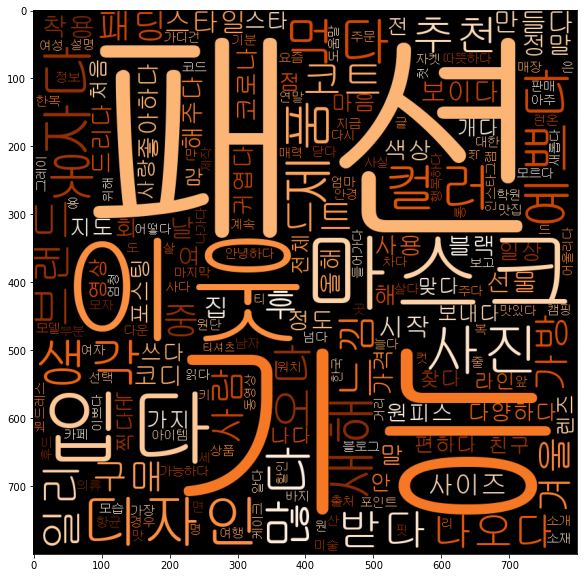

In [194]:
#명사, 동사, 형용사, 부사로 워드클라우드

font_path='C:\Windows\Fonts\gulim.ttc'

wordclouds = WordCloud(width=800,
                       height=800,
                       background_color='Black',
                       colormap='Oranges',
                       font_path=font_path)
from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig=plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

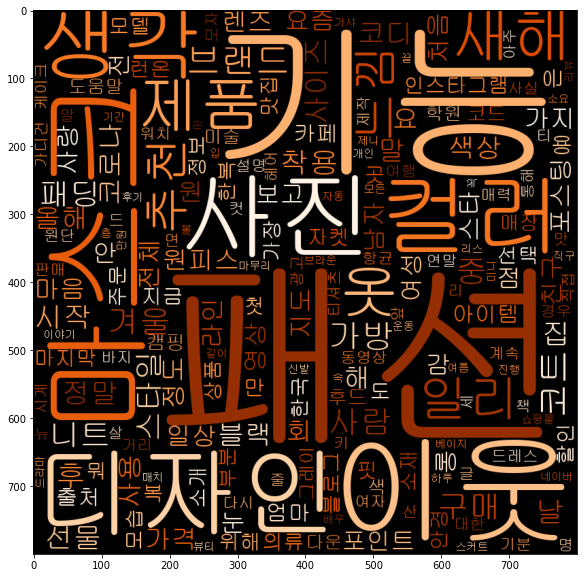

In [195]:
# 명사로만 워드클라우드
font_path='C:\Windows\Fonts\gulim.ttc'
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width = 800,
                       height = 800,
                       background_color = 'Black',
                       colormap = 'Oranges',
                       font_path = font_path)
from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

### 군집분석 - Clustering(Actor 도출)

### tf-idf

In [196]:
data3 = []

for i in data1 :
    string = i[0]
    for w in i[1:] : #첫번재 이후 단어부터 토큰으로 이어 붙여줌
        string += " " #단어 사이는 띄어쓰기로 연결
        string += w #(띄어쓰기 후 다음 단어) 써주기를 반복
    data3.append(string)
data3[1] #쉼표를 기분으로 document가 구분됨(,)

'새해 밝다 기념 지난 해 고생 선물 해주다 생각 고르다 중인 위시 템 정리 글 첫 텔파 가방 사실 저번 달 사다 공홈 들락날락 거려 타이밍 이안 맞다 건지다 직구 힘들다 크림 색 스몰 사다 스토어 파다 뒤지다 스토어 파다 가품 많다 재고 많다 의심스럽다 가격 쿠폰 먹이 확 저렴하다 서정 품 문의 해봤다 보증 정품 답변 해주다 급 버튼 브레이크 직구 답 두번째 넘다 징하겤 아직도 사다 소리 정도 아크네 베이커 솔직하다 이정 위시 이미 사다 사다 사다 사다 사다 막상 사다 전 매치 패션 싸다 팔다 보고 이후 공홈 재고 사다 뒤늦다 꽂히다 르 메르 카트리지 백이 욯 귀엽다 아른거리다 진 메다 악세사리 비비안 웨스트우드 페트라 목걸이 색상 바뀌다 알아보다 리뉴얼 해 리뉴얼 전 버전 기다 신형 구형 넘다 힘들다 카드 지갑 바꾸다 찾아보다 눈 들어오다 마르지 엘라 로고 바이 폴드 지갑 수납 공간 크기 쓰다 정도 메종 마르지 엘라 왠지 흰색 써주다 마음 카드 지갑 젤 사다 아직 나오다 리얼 위시 템 어리다 산타할아버지 달라 요즘 물량 풀리다 눈 돌아가다 뻔 문제 일주일 먼지 쌓이다 확 결제 갑 초코송이 이름 귀엽다 섴 하양 송이 귀엽다 맛 핵노맛 엄마 보내다 짤 친구 도 써먹었닼 아웃 겨 많다 제일 예쁘다 다가 올리다 아주 밉다 개다 성 눈새 꺼지다 행복하다 일상 되찾다'

In [197]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [198]:
from collections import defaultdict

word2id = defaultdict(lambda:0) #value가 없는 key인 경우 error대신 0을 출력

In [199]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [200]:
tfidf = []
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

In [201]:
tfidf[1]

[('새해', 0.02884501882815728),
 ('밝다', 0.04234714835617644),
 ('기념', 0.061149089884247464),
 ('지난', 0.05068626552701027),
 ('해', 0.0),
 ('고생', 0.061149089884247464),
 ('선물', 0.03952106743713669),
 ('해주다', 0.0659030757944392),
 ('생각', 0.028676766757940755),
 ('고르다', 0.04710743613022715),
 ('중인', 0.0676730344050677),
 ('위시', 0.24117516964355384),
 ('템', 0.0),
 ('정리', 0.05068626552701027),
 ('글', 0.0),
 ('첫', 0.0),
 ('텔파', 0.08039172321451794),
 ('가방', 0.04375995585284045),
 ('사실', 0.04147932667355951),
 ('저번', 0.06514229709271507),
 ('달', 0.0),
 ('사다', 0.4562725934091546),
 ('공홈', 0.1415408130987654),
 ('들락날락', 0.08039172321451794),
 ('거려', 0.08039172321451794),
 ('타이밍', 0.0747636137578503),
 ('이안', 0.08039172321451794),
 ('맞다', 0.03516730422090348),
 ('건지다', 0.06514229709271507),
 ('직구', 0.13028459418543015),
 ('힘들다', 0.09298083569214018),
 ('크림', 0.05440993755117396),
 ('색', 0.0),
 ('스몰', 0.06514229709271507),
 ('사다', 0.4562725934091546),
 ('스토어', 0.10137253105402054),
 ('파다', 0.1110419

### 토픽 개수 정하기

In [202]:
from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [203]:
#tuple로 mapping해주는 함수, doc2bow
corpus = [dictionary.doc2bow(text) for text in data1]

In [204]:
corpus[:1]

[[(0, 1),
  (1, 2),
  (2, 3),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 3),
  (8, 12),
  (9, 1),
  (10, 2),
  (11, 4),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 4),
  (25, 2),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 4),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 5),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 3),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 5),
  (74, 1),
  (75, 2),
  (76, 3),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 5),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 2

In [205]:
import gensim
values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                               num_topics=i,
                                               id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))

Text(0, 0.5, 'Score')

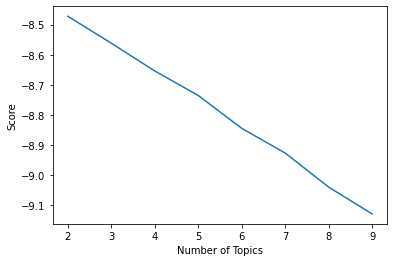

In [206]:
x = range(2,10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

In [210]:
#coherence 확인(군집평가)
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel,
                                        texts = data1,
                                        dictionary=dictionary,
                                        topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


Text(0, 0.5, 'Score')

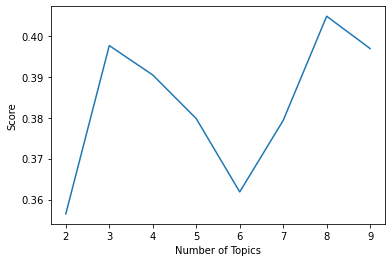

In [211]:
X = range(2,10)
plt.plot(X, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

### ward clustering
- 데이터의 수직적 구조를 파악할 수 있음

In [212]:
#라이브러리 import
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [215]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [216]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [217]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

In [218]:
result = cluster.fit_predict(df1)

In [219]:
df_ward = data.copy()

In [220]:
df_ward['클러스터'] = list(result)

In [222]:
df_ward.head()

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,양 자 ...,"[양, 역, 학, 패, 션, 아침, 고르다, 옷, 마음, 안, 들어서다, 갈아입다,...","[양, 역, 학, 패, 션, 아침, 옷, 마음, 안, 지각, 경험, 방바닥, 옷, ...",2
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,새해가 밝은 기념 지난 한 해 고생한 나...,"[새해, 밝다, 기념, 지난, 해, 고생, 선물, 해주다, 생각, 고르다, 중인, ...","[새해, 기념, 지난, 해, 고생, 선물, 생각, 중인, 위시, 템, 정리, 글, ...",0
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 올블랙코디 주인장의 코디 ...,"[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 이웃, 기능, 주인, 올블랙,...","[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 이웃, 기능, 주인, 올블랙,...",0
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 ...,"[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...","[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...",2
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,핫딜 직구 르메르 세일에 추가할인코드 마...,"[핫딜, 직구, 르, 메르, 할인, 코드, 마지막, 날, 매치, 패션, 직구, 고고...","[핫딜, 직구, 르, 메르, 할인, 코드, 마지막, 날, 매치, 패션, 직구, 고고...",2


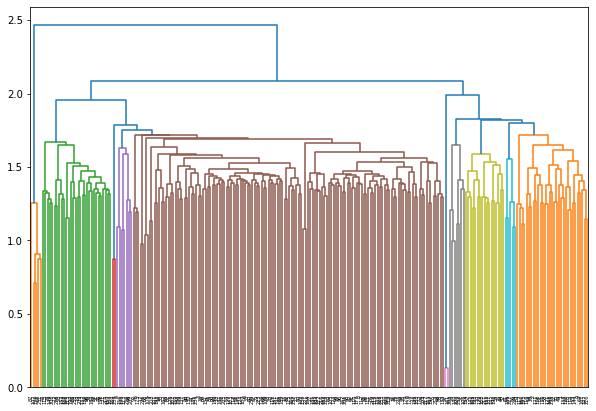

In [223]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [225]:
#파일 저장
import pickle
df_ward.to_pickle('패션_clustering.pkl')
df_ward.to_csv('패션_clustering.csv', encoding='utf-8-sig')